In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/myDrive")

Mounted at /content/myDrive


# Do some statistic with dataset 1


In [ ]:
import pandas as pd
df_9_ex = pd.read_excel("/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset1/data_match9.xlsx").dropna()
df_9_ex.head(3)

In [ ]:
df_9_ex[df_9_ex['id'] == '090059']['lon'].unique()

In [ ]:
import pandas as pd
df_10_ex = pd.read_excel("/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset1/data_match10.xlsx").dropna()
df_10_ex.head(3)

In [ ]:
len(df_10_ex['name'])

In [ ]:
len(df_9_ex['name'])

In [ ]:
import numpy as np

In [ ]:
pd.Series(np.array(df_9_ex['datetime']))

0       2019-09-02 00:00:00
1       2019-09-02 06:00:00
2       2019-09-02 07:00:00
3       2019-09-02 08:00:00
4       2019-09-02 09:00:00
                ...        
86266   2019-09-30 19:00:00
86267   2019-09-30 20:00:00
86268   2019-09-30 21:00:00
86269   2019-09-30 22:00:00
86270   2019-09-30 23:00:00
Length: 86271, dtype: datetime64[ns]

In [ ]:
tmp_df = df_9_ex[df_9_ex['name'] == "MuongLong"]

In [ ]:
print(df_9_ex[df_9_ex['id'] == '-']['name'].unique())

['DonPhuc' 'PhucTrach']


In [ ]:
for id in df_10_ex['id'].unique():
  print(df_10_ex[df_10_ex['id'] == id]['name'].unique())

In [ ]:
print(df_9_ex[df_9_ex['id'] == '264504']['name'].unique())

['TamHop' 'TamHop2']


In [ ]:
print(df_9_ex[df_9_ex['name'] == 'TamHop']['lon'].unique())

[104.448333]


In [ ]:
print(df_9_ex[df_9_ex['name'] == 'TamHop2']['lon'].unique())

[104.448333]


# Building data and model based on dataset 1


In [ ]:
def process_time_column(data_path):
  df = pd.read_excel(data_path).dropna()
  df['datetime'] = pd.to_datetime(df['datetime'])
  df['day'], df['time'] = df['datetime'].dt.date, df['datetime'].dt.time
  return df.sort_values(by=['id', 'day', 'time']).drop(columns=['lat', 'lon', 'day', 'time'])

In [ ]:
df_9 = process_time_column("/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset1/data_match9.xlsx")
df_10 = process_time_column("/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset1/data_match10.xlsx")

In [ ]:
df_9.drop(columns=["id", 'name']).iloc[0, 0]

0.0

In [ ]:
df_9.drop(columns=["id", 'name']).iloc[0, [i for i in range(2, 20)]]

B04B       0.31354
B05B      0.133524
B06B      0.095137
B09B    238.541565
B10B    245.962646
B11B    262.033875
B12B    248.734024
B14B    259.075958
B16B    248.668777
I2B     255.719315
I4B     278.503326
IRB     262.328064
VSB       0.278758
WVB     230.306183
CAPE      364.8125
TCC       0.999995
TCW       68.29744
TCWV     66.952896
Name: 64277, dtype: object

In [ ]:
df_9.drop(columns=['id', 'name']).iloc[0]

value                       0.0
datetime    2019-09-02 00:00:00
B04B                    0.31354
B05B                   0.133524
B06B                   0.095137
B09B                 238.541565
B10B                 245.962646
B11B                 262.033875
B12B                 248.734024
B14B                 259.075958
B16B                 248.668777
I2B                  255.719315
I4B                  278.503326
IRB                  262.328064
VSB                    0.278758
WVB                  230.306183
CAPE                   364.8125
TCC                    0.999995
TCW                    68.29744
TCWV                  66.952896
IMERG                  5.654023
Name: 64277, dtype: object

In [ ]:
len(df_9['name'])

86271

In [ ]:
len(df_10['name'])

75665

In [ ]:
df_9.loc[(df_9['id'] == '-') & (df_9['name'] == 'PhucTrach')].drop(columns=['id', 'name'])

,value,datetime,B04B,B05B,B06B,B09B,B10B,B11B,B12B,B14B,...,I2B,I4B,IRB,VSB,WVB,CAPE,TCC,TCW,TCWV,IMERG
64277,0.0,2019-09-02 00:00:00,0.313540,0.133524,0.095137,238.541565,245.962646,262.033875,248.734024,259.075958,...,255.719315,278.503326,262.328064,0.278758,230.306183,364.8125,0.999995,68.297440,66.952896,5.654023
64278,0.0,2019-09-02 01:00:00,0.590572,0.162384,0.166667,230.304245,233.701889,240.938919,235.206284,237.305557,...,235.135544,266.168732,240.089828,0.553570,224.959763,377.4375,1.000000,68.985672,67.447006,14.114376
64279,0.0,2019-09-02 02:00:00,0.683031,0.245129,0.226969,225.412323,228.928345,235.638397,232.283081,231.105865,...,228.971252,270.727539,234.563675,0.642138,221.015671,478.3125,1.000004,69.505859,67.773071,17.704895
64280,0.0,2019-09-02 03:00:00,0.628140,0.288306,0.243869,225.670959,229.552170,239.089691,235.701401,234.415634,...,231.001572,277.428070,243.170700,0.524425,220.880875,458.4375,0.999994,69.178131,67.046738,7.502751
64281,0.0,2019-09-02 04:00:00,0.781289,0.243488,0.269933,218.464905,220.495850,223.731186,225.530075,220.254578,...,218.747665,263.031219,222.371674,0.764798,215.765320,422.8750,0.999996,68.782532,66.633911,16.779648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64919,0.0,2019-09-30 19:00:00,0.000000,0.000000,0.000000,257.774109,265.805664,289.543213,266.369995,292.359955,...,290.621582,291.317780,291.963196,0.000000,247.069168,18.6250,0.006042,23.856400,23.854248,0.000000
64920,0.0,2019-09-30 20:00:00,0.000000,0.000000,0.000000,258.104736,265.876343,289.364014,266.296295,292.151611,...,290.424713,291.188843,291.825409,0.000000,247.472153,17.1250,0.004700,24.651154,24.648041,0.000000
64921,0.0,2019-09-30 21:00:00,0.000000,0.000000,0.000000,258.527832,265.876343,289.268005,266.109100,292.037140,...,290.327820,291.056641,291.672211,0.000000,247.589401,24.3125,0.003998,25.577911,25.573029,0.000000
64922,0.0,2019-09-30 22:00:00,0.001953,0.000326,0.000000,258.218719,265.876343,289.086639,265.920441,291.894012,...,290.085571,290.885712,291.515564,0.001276,247.303635,19.0000,0.148254,26.693649,26.691696,0.000000


In [ ]:
for i in range(len(df_9)):
  if df_9.iloc[i, 0] == '-':
    df_9.iloc[i, 0] = df_9.iloc[i, 1]

In [ ]:
df_9[df_9['name'] == 'PhucTrach' ]

,id,name,value,datetime,B04B,B05B,B06B,B09B,B10B,B11B,...,I2B,I4B,IRB,VSB,WVB,CAPE,TCC,TCW,TCWV,IMERG
64277,PhucTrach,PhucTrach,0.0,2019-09-02 00:00:00,0.313540,0.133524,0.095137,238.541565,245.962646,262.033875,...,255.719315,278.503326,262.328064,0.278758,230.306183,364.8125,0.999995,68.297440,66.952896,5.654023
64278,PhucTrach,PhucTrach,0.0,2019-09-02 01:00:00,0.590572,0.162384,0.166667,230.304245,233.701889,240.938919,...,235.135544,266.168732,240.089828,0.553570,224.959763,377.4375,1.000000,68.985672,67.447006,14.114376
64279,PhucTrach,PhucTrach,0.0,2019-09-02 02:00:00,0.683031,0.245129,0.226969,225.412323,228.928345,235.638397,...,228.971252,270.727539,234.563675,0.642138,221.015671,478.3125,1.000004,69.505859,67.773071,17.704895
64280,PhucTrach,PhucTrach,0.0,2019-09-02 03:00:00,0.628140,0.288306,0.243869,225.670959,229.552170,239.089691,...,231.001572,277.428070,243.170700,0.524425,220.880875,458.4375,0.999994,69.178131,67.046738,7.502751
64281,PhucTrach,PhucTrach,0.0,2019-09-02 04:00:00,0.781289,0.243488,0.269933,218.464905,220.495850,223.731186,...,218.747665,263.031219,222.371674,0.764798,215.765320,422.8750,0.999996,68.782532,66.633911,16.779648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64919,PhucTrach,PhucTrach,0.0,2019-09-30 19:00:00,0.000000,0.000000,0.000000,257.774109,265.805664,289.543213,...,290.621582,291.317780,291.963196,0.000000,247.069168,18.6250,0.006042,23.856400,23.854248,0.000000
64920,PhucTrach,PhucTrach,0.0,2019-09-30 20:00:00,0.000000,0.000000,0.000000,258.104736,265.876343,289.364014,...,290.424713,291.188843,291.825409,0.000000,247.472153,17.1250,0.004700,24.651154,24.648041,0.000000
64921,PhucTrach,PhucTrach,0.0,2019-09-30 21:00:00,0.000000,0.000000,0.000000,258.527832,265.876343,289.268005,...,290.327820,291.056641,291.672211,0.000000,247.589401,24.3125,0.003998,25.577911,25.573029,0.000000
64922,PhucTrach,PhucTrach,0.0,2019-09-30 22:00:00,0.001953,0.000326,0.000000,258.218719,265.876343,289.086639,...,290.085571,290.885712,291.515564,0.001276,247.303635,19.0000,0.148254,26.693649,26.691696,0.000000


In [ ]:
for id in df_9['id'].unique():
  print(df_9[df_9['id'] == id]['name'].unique())

['PhucTrach']
['DonPhuc']
['HanhLam']
['HongSon']
['HuyenYenThanh']
['ThanhThuy']
['BacSon']
['MuongKhen']
['Vinh ']
['BanChaLum']
['ThanhHa']
['XuanPhong']
['KimTien']
['DongBang']
['DoanKet']
['YenKhuong']
['XuanMinh']
['DonBienPhong771']
['CaoSon']
['TanHoa']
['MuongLong']
['XaNaLoi']
['HuyenKySon']
['LacLuong']
['CaoQuang']
['VanPhongDieuHanh']
['XaChauHoan']
['SonNam(ChauLy)']
['HoaDaHan']
['LungVan']
['NamPhong']
['NuongDam']
['BaKhan']
['BQLNGocSon']
['AnBinh']
['HoCuLay']
['TienPhong']
['DongLai']
['NgoiHoa']
['PuBin']
['LacSy']
['ThuongTien']
['HuongNhuong']
['LongSap']
['HuaPang']
['TanTruong']
['LuongNgoai']
['SongLuong']
['YenNhan']
['PhucSon']
['BanHangDoi']
['TamTrung']
['Thủy điện Đồng Văn']
['LongSap']
['SonTruong']
['YenThuy']
['TamHop' 'TamHop2']
['HuongTho']
['Yen Thang']
['DucLong']
['Trooc']
['Chi Cuc Thuy Loi']
['Ky Thuong']
['Thanh Huong']
['Son Kim 1']
['Huong Quang']
['Son Kim 2']
['Huong Dien']
['Ho Kim Son']
['Son Trach']
['Tam Hop']
['Na Ngoi']
['Binh Chuan'

In [ ]:
df_9.head(2)

,id,name,value,datetime,B04B,B05B,B06B,B09B,B10B,B11B,...,I2B,I4B,IRB,VSB,WVB,CAPE,TCC,TCW,TCWV,IMERG
64277,PhucTrach,PhucTrach,0.0,2019-09-02 00:00:00,0.313540,0.133524,0.095137,238.541565,245.962646,262.033875,...,255.719315,278.503326,262.328064,0.278758,230.306183,364.8125,0.999995,68.29744,66.952896,5.654023
52820,DonPhuc,DonPhuc,0.0,2019-09-02 01:00:00,0.406744,0.224906,0.185114,230.560913,235.618607,247.553040,...,241.936218,275.136414,247.388489,0.371888,224.498520,370.4375,1.000000,58.90657,58.669662,0.000000


In [ ]:
import numpy as np

In [ ]:
df_9['id'].unique()

In [ ]:
for id in df_9['id'].unique():
  if len(df_9[df_9['id'] == id]['name'].unique()) > 1:
    print(id, df_9[df_9['id'] == id]['name'].unique())

264504 ['TamHop' 'TamHop2']


In [ ]:
df_9[df_9['name'] == 'TamHop']['lon'].unique()

KeyError: ignored

In [ ]:
def building_data(df):
  X = []
  y = []
  IMERG = []
  id_list = df['id'].unique()
  for index in id_list:
    tmp_df = df.loc[df['id'] == index].drop(columns=['id', 'name'])
    for i in range(2, len(tmp_df)):
      if tmp_df.iloc[i, 1] + pd.Timedelta(-1, 'h') == tmp_df.iloc[i - 1, 1] and tmp_df.iloc[i, 1] + pd.Timedelta(-2, 'h') == tmp_df.iloc[i - 2, 1]:
        X.append(np.array([np.array(list([np.array(tmp_df.iloc[i - 2, [x for x in range(2, 20)]], dtype=np.float32),
                                          np.array(tmp_df.iloc[i - 1, [x for x in range(2, 20)]], dtype=np.float32),
                                          np.array(tmp_df.iloc[i, [x for x in range(2, 20)]], dtype=np.float32)]))]))
        y.append(tmp_df.iloc[i, 0])
        IMERG.append(tmp_df.iloc[i, 20])
  
  X = np.array(X)
  return X.reshape(X.shape[0], X.shape[2], X.shape[3]), np.array(y), np.array(IMERG)

In [ ]:
df_9.drop(columns=['id', 'name']).iloc[1]

value                       0.0
datetime    2019-09-02 01:00:00
B04B                   0.406744
B05B                   0.224906
B06B                   0.185114
B09B                 230.560913
B10B                 235.618607
B11B                  247.55304
B12B                 239.070862
B14B                 244.839661
B16B                 236.860733
I2B                  241.936218
I4B                  275.136414
IRB                  247.388489
VSB                    0.371888
WVB                   224.49852
CAPE                   370.4375
TCC                         1.0
TCW                    58.90657
TCWV                  58.669662
IMERG                       0.0
Name: 52820, dtype: object

In [ ]:
tmp_df_9 = df_9.loc[(df_9['id'] == 'PhucTrach') & (df_9['name'] == 'PhucTrach')]

In [ ]:
tmp_df_9.iloc[2]

id                    PhucTrach
name                  PhucTrach
value                       0.0
datetime    2019-09-02 02:00:00
B04B                   0.683031
B05B                   0.245129
B06B                   0.226969
B09B                 225.412323
B10B                 228.928345
B11B                 235.638397
B12B                 232.283081
B14B                 231.105865
B16B                 225.426727
I2B                  228.971252
I4B                  270.727539
IRB                  234.563675
VSB                    0.642138
WVB                  221.015671
CAPE                   478.3125
TCC                    1.000004
TCW                   69.505859
TCWV                  67.773071
IMERG                 17.704895
Name: 64279, dtype: object

In [ ]:
I = []
for i in range(2, len(tmp_df_9)):
  if tmp_df_9.iloc[i, 3] + pd.Timedelta(-1, 'h') == tmp_df_9.iloc[i - 1, 3] and tmp_df_9.iloc[i, 3] + pd.Timedelta(-2, 'h') == tmp_df_9.iloc[i - 2, 3]:
    pass
  else:
    I.append(i)

In [ ]:
len(I)

56

In [ ]:
for i in I:
  print(tmp_df_9.iloc[i]['datetime'], tmp_df_9.iloc[i-1]['datetime'])

In [ ]:
X_df_9, y_df_9, IMERG_df_9 = building_data(df_9)
X_df_10, y_df_10, IMERG_df_10 = building_data(df_10)

In [ ]:
X_df_9.shape

(64966, 3, 18)

In [ ]:
(y_df_9 > 0).astype(np.int16)

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [ ]:
len([y for y in y_df_9 if y == 0])

59698

In [ ]:
X_df_9.shape

(64966, 3, 18)

In [ ]:
X_df_10.shape

(56374, 3, 18)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import BatchNormalization
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, classification_report, roc_auc_score

In [ ]:
def model_b():
    model = Sequential()
    model.add(LSTM(32, input_shape=(3, 18)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation= tf.keras.activations.sigmoid))
    model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.AUC()])
    print(model.summary()), model.output_shape
    return model

def model_r():
    model = Sequential()
    model.add(LSTM(32, input_shape=(3, 18)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam', loss=keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.AUC()])
    print(model.summary()), model.output_shape
    return model

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [ ]:
def get_result(train_X, train_y, test_X, test_y, batch_size, epoch):
    model_cls = model_b()
    model_regr = model_r()
    # training classifier model
    # print("start classification training....")
    # model_cls.fit(train_X, (train_y > 0).astype(np.int16), validation_data=(test_X, (test_y > 0).astype(np.int16)), batch_size=batch_size, epochs=epoch, callbacks=[early_stopping_monitor])
    # print("start classification testing....")
    # y_cls_pred = model_cls.predict(test_X)
    # # y true is test_y > 0.5
    # y_cls_true = (test_y > 0).astype(np.int16)
    # a = (model_cls.predict(train_X) > 0.5).astype(np.int16)
    # b = (model_cls.predict(test_X) > 0.5).astype(np.int16)
    # print(len([tmp for tmp in a if tmp == 0]))
    # print(len([tmp for tmp in b if tmp == 0]))
    # # training regressor model
    # train_r_y = np.array([train_y[i] for i in range(train_y.shape[0]) if a[i] == 1])
    # train_r_X = np.array([train_X[i] for i in range(train_y.shape[0]) if  a[i] == 1])
    
    # test_r_X = np.array([test_X[i] for i in range(test_X.shape[0]) if b[i] == 1])
    # test_r_y = np.array([test_y[i] for i in range(test_y.shape[0]) if b[i] == 1])

    # print(test_r_X.shape, test_r_y.shape)
    # print(train_r_X.shape, train_r_y.shape)
    train_r_X = train_X
    train_r_y = train_y
    test_r_X = test_X
    test_r_y = test_y
    print("start regression training....")
    model_regr.fit(train_r_X, train_r_y, validation_data=(test_r_X, test_r_y), batch_size=batch_size, epochs=epoch, callbacks=[early_stopping_monitor])
    print("start regression testing....")
    y_regr_pred = model_regr.predict(test_X)

    # y_regr_pred = np.array([b[i] * y_regr_pred[i] for i in range(y_regr_pred.shape[0])])
    # y_cls_pred return for probability form
    # y_cls_true return for [0, 1] form
    # y_regr_pred return for float form
    # test_y present for y_regr_true
    # return y_cls_pred, y_cls_true, y_regr_pred, test_y
    return  y_regr_pred, test_y

In [ ]:
# y_cls_pred, y_cls_true, y_regr_pred, y_regr_true = get_result(X_df_9, y_df_9, X_df_10, y_df_10, 32, 10)
y_regr_pred, y_regr_true = get_result(X_df_9, y_df_9, X_df_10, y_df_10, 32, 10)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 32)                6528      
                                                                 
 batch_normalization_8 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dense_26 (Dense)            (None, 1)                 9         
                                                                 
Total params: 7,329
Trainable params: 7,265
Non-trainable params: 64
___________________________________________________

In [ ]:
print(classification_report((y_cls_pred > 0.5).astype(np.int16), y_cls_true))

In [ ]:
import os

# Data feature engineering and .npz files saving for dataset 3

In [ ]:
import pandas as pd

In [ ]:
root_dir = "/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset3/"

In [ ]:
import os

In [ ]:
def listdirs(rootdir):
    for file in os.listdir(rootdir):
        d = os.path.join(rootdir, file)
        if os.path.isdir(d):
            print(d)
            listdirs(d)

In [ ]:
listdirs(root_dir)

In [ ]:
date_list = ['06', '07', '08', '09', '10', '15', '16', '17', '18', '19', '20']
time_list = [i for i in range(0, 24)]

In [ ]:
datetime_list =  []
for date in date_list:
  rng = pd.date_range(start=date + '/10/2020', periods = 24, freq='h')
  tmp_df = pd.DataFrame({'datetime':rng})
  datetime_list.append(tmp_df)

<ipython-input-9-f7fec6cd8798>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  rng = pd.date_range(start=date + '/10/2020', periods = 24, freq='h')
<ipython-input-9-f7fec6cd8798>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  rng = pd.date_range(start=date + '/10/2020', periods = 24, freq='h')
<ipython-input-9-f7fec6cd8798>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  rng = pd.date_range(start=date + '/10/2020', periods = 24, freq='h')
<ipython-input-9-f7fec6cd8798>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default)

In [ ]:
datetime_df = pd.concat(datetime_list, ignore_index=True)

In [ ]:
datetime_df

,datetime
0,2020-06-10 00:00:00
1,2020-06-10 01:00:00
2,2020-06-10 02:00:00
3,2020-06-10 03:00:00
4,2020-06-10 04:00:00
...,...
259,2020-10-20 19:00:00
260,2020-10-20 20:00:00
261,2020-10-20 21:00:00
262,2020-10-20 22:00:00


In [ ]:
def convert(num):
  if num < 10:
    return "0" + str(num)
  else:
    return str(num)

In [ ]:
dataset_3 = {}
# dataset_3["CAPE"] = []
# dataset_3["ISOR"]= []
# dataset_3["TCC" ]= []
# dataset_3["TCW"] = []
# dataset_3["TCWV"] = []
# dataset_3["B09B"] = []
# dataset_3["B10B"] = []
# dataset_3["B11B"] = []
# dataset_3["B12B"] = []
# dataset_3["B14B"] = []
# dataset_3["B16B"] = []
# dataset_3["I2B"] = []
# dataset_3["I4B"] = []
# dataset_3["IRB"] = []
# dataset_3["WVB"] = []
dataset_3["radar"] = [] #1
dataset_3['era'] = [] #5
dataset_3['visible'] = [] #5
dataset_3['ni'] = [] #2
dataset_3['wv'] = [] #1
dataset_3['ir'] = [] #1
dataset_3['btd'] = [] #2
dataset_3['raw_radar'] = []
# dataset_3["time"] = []

In [ ]:
root_dir

'/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset3/'

In [ ]:
from PIL import Image

In [ ]:
import numpy as np

In [ ]:
save_np_dir = "/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset3/utilized_data/"

In [ ]:
date_list

['06', '07', '08', '09', '10', '15', '16', '17', '18', '19', '20']

In [ ]:
for date in date_list:
  for i in range(0, 24):
    hour = convert(i)
    # time.append[pd.Timestamp('2020-' + date + '-10 ' + hour + ':00:00')]
    CAPE_path = root_dir + "CAPE/2020/10/" + date + "/" + hour + "/CAPE_202010" + date + "_" + hour +".tif"
    ISOR_path = root_dir + "ISOR/2020/10/" + date + "/" + hour + "/ISOR_202010" + date + "_" + hour +".tif"
    TCC_path = root_dir + "TCC/2020/10/" + date + "/" + hour + "/TCC_202010" + date + "_" + hour +".tif"
    TCW_path = root_dir + "TCW/2020/10/" + date + "/" + hour + "/TCW_202010" + date + "_" + hour +".tif"
    TCWV_path = root_dir + "TCWV/2020/10/" + date + "/" + hour + "/TCWV_202010" + date + "_" + hour +".tif"
    B09B_path = root_dir + "himawari/2020/10/" + date + "/" + hour + "/hima_202010" + date + "_B09B_"+ hour +".tif"
    B10B_path = root_dir + "himawari/2020/10/" + date + "/" + hour + "/hima_202010" + date + "_B10B_"+ hour +".tif"
    B11B_path = root_dir + "himawari/2020/10/" + date + "/" + hour + "/hima_202010" + date + "_B11B_"+ hour +".tif"
    B12B_path = root_dir + "himawari/2020/10/" + date + "/" + hour + "/hima_202010" + date + "_B12B_"+ hour +".tif"
    B14B_path = root_dir + "himawari/2020/10/" + date + "/" + hour + "/hima_202010" + date + "_B14B_"+ hour +".tif"
    B16B_path = root_dir + "himawari/2020/10/" + date + "/" + hour + "/hima_202010" + date + "_B16B_"+ hour +".tif"
    I2B_path = root_dir + "himawari/2020/10/" + date + "/" + hour + "/hima_202010" + date + "_I2B_"+ hour +".tif"
    I4B_path = root_dir + "himawari/2020/10/" + date + "/" + hour + "/hima_202010" + date + "_I4B_"+ hour +".tif"
    IRB_path = root_dir + "himawari/2020/10/" + date + "/" + hour + "/hima_202010" + date + "_IRB_"+ hour +".tif"
    WVB_path = root_dir + "himawari/2020/10/" + date + "/" + hour + "/hima_202010" + date + "_WVB_"+ hour +".tif"
    radar_path = root_dir + "radar/2020/10/" + date + "/" + hour + "/radar_202010" + date + "_" + hour +".tif"


    if os.path.exists(CAPE_path) and os.path.exists(ISOR_path) and os.path.exists(TCC_path) and os.path.exists(TCW_path) and os.path.exists(TCWV_path):
      CAPE_img = np.array(Image.open(CAPE_path))
      ISOR_img = np.array(Image.open(ISOR_path))
      TCC_img = np.array(Image.open(TCC_path))
      TCW_img = np.array(Image.open(TCW_path))
      TCWV_img = np.array(Image.open(TCWV_path))
      img = np.array([CAPE_img, ISOR_img, TCC_img, TCW_img, TCWV_img])
      dataset_3["era"].append(img)
      # np.save(save_np_dir + "era/202010" + date + "_" + hour, img)

    else:
      print(date, i)
      dataset_3["era"].append(np.nan)
    # else:
    #   tmp_np = np.empty((512, 512))
    #   tmp_np[:] = np.nan
    #   CAPE.append(tmp_np)


    if os.path.exists(B09B_path) and os.path.exists(B10B_path) and os.path.exists(B11B_path) and os.path.exists(B12B_path) and os.path.exists(B14B_path):
      B09B_img = np.array(Image.open(B09B_path))
      B10B_img = np.array(Image.open(B10B_path))
      B11B_img = np.array(Image.open(B11B_path))
      B12B_img = np.array(Image.open(TCW_path))
      B14B_img = np.array(Image.open(B14B_path))
      img = np.array([B09B_img, B10B_img, B11B_img, B12B_img, B14B_img])
      dataset_3["visible"].append(img)
      # np.save(save_np_dir + "visible/202010" + date + "_" + hour, img)
    else:
      print(date, i)
      dataset_3["visible"].append(np.nan)
    # else:
    #   tmp_np = np.empty((512, 512))
    #   tmp_np[:] = np.nan
    #   CAPE.append(tmp_np)

    if os.path.exists(I4B_path) and os.path.exists(I2B_path):
      I4B_img = np.array(Image.open(I4B_path))
      I2B_img = np.array(Image.open(I2B_path))
      img = np.array([I2B_img, I4B_img])
      dataset_3["ni"].append(img)
      # np.save(save_np_dir + "ni/202010" + date + "_" + hour, img)
    else:
      print(date, i)
      dataset_3["ni"].append(np.nan)
  #  else:
  #     tmp_np = np.empty((512, 512))
  #     tmp_np[:] = np.nan
  #     ISOR.append(tmp_np)

    if os.path.exists(WVB_path):
      img = np.array(Image.open(WVB_path))
      img = np.expand_dims(img, axis=0)
      dataset_3["wv"].append(img)
      # np.save(save_np_dir + "wv/202010" + date + "_" + hour, img)
    else:
      print(date, i)
      dataset_3["wv"].append(np.nan)
    # else:
    #   tmp_np = np.empty((512, 512))
    #   tmp_np[:] = np.nan
    #   TCC.append(tmp_np)
    
    if os.path.exists(IRB_path):
      img = np.array(Image.open(IRB_path))
      img = np.expand_dims(img, axis=0)
      dataset_3["ir"].append(img)
      # np.save(save_np_dir + "ir/202010" + date + "_" + hour, img)
    else:
      print(date, i)
      dataset_3["ir"].append(np.nan)
    # else:
    #   tmp_np = np.empty((512, 512))
    #   tmp_np[:] = np.nan
    #   TCW.append(tmp_np)

    if os.path.exists(WVB_path) and os.path.exists(IRB_path) and os.path.exists(B16B_path):

      img_1 = abs(np.array(Image.open(WVB_path)) - np.array(Image.open(IRB_path)))
      img_2 = abs(np.array(Image.open(IRB_path)) - np.array(Image.open(B16B_path)))
      img = np.array([img_1, img_2])
      # np.save(save_np_dir + "btd/202010" + date + "_" + hour, img)
      dataset_3["btd"].append(img)
    else:
      print(date, i)
      dataset_3["btd"].append(np.nan)
      
    # else:
    #   tmp_np = np.empty((512, 512))
    #   tmp_np[:] = np.nan
    #   TCWV.append(tmp_np)

    # if os.path.exists(B09B_path):
    #   img = np.array(Image.open(B09B_path))
    #   dataset_3['B09B'].append(np.array(img))
    # else:
    #   print(date, i)
    #   dataset_3['B09B'].append(np.nan)
    # # else:
    # #   tmp_np = np.empty((512, 512))
    # #   tmp_np[:] = np.nan
    # #   B09B.append(tmp_np)

    
    # if os.path.exists(B10B_path):
    #   img = np.array(Image.open(B10B_path))
    #   dataset_3['B10B'].append(np.array(img))
    # else:
    #   print(date, i)
    #   dataset_3['B10B'].append(np.nan)
    # # else:
    # #   tmp_np = np.empty((512, 512))
    # #   tmp_np[:] = np.nan
    # #   B10B.append(tmp_np)

   
    # if os.path.exists(B11B_path):
    #   img = np.array(Image.open(B11B_path))
    #   dataset_3['B11B'].append(np.array(img))
    # else:
    #   print(date, i)
    #   dataset_3['B11B'].append(np.nanmin)
    # # else:
    # #   tmp_np = np.empty((512, 512))
    # #   tmp_np[:] = np.nan
    # #   B11B.append(tmp_np)
    

    # if os.path.exists(B12B_path):
    #   img = np.array(Image.open(B12B_path))
    #   dataset_3['B12B'].append(np.array(img))
    # else:
    #   print(date, i)
    #   dataset_3['B12B'].append(np.nan)
    # # else:
    # #   tmp_np = np.empty((512, 512))
    # #   tmp_np[:] = np.nan
    # #   B12B.append(tmp_np)
    
    
    # if os.path.exists(B14B_path):
    #   img = np.array(Image.open(B14B_path))
    #   dataset_3['B14B'].append(np.array(img))
    # else:
    #   print(date, i)
    #   dataset_3['B14B'].append(np.nan)
    # # else:
    # #   tmp_np = np.empty((512, 512))
    # #   tmp_np[:] = np.nan
    # #   B14B.append(tmp_np)

    # if os.path.exists(B16B_path):
    #   img = np.array(Image.open(B16B_path))
    #   dataset_3['B16B'].append(np.array(img))
    # else:
    #   print(date, i)
    #   dataset_3['B16B'].append(np.nan)
    # # else:
    # #   tmp_np = np.empty((512, 512))
    # #   tmp_np[:] = np.nan
    # #   B16B.append(tmp_np)

    # if os.path.exists(I2B_path):
    #   img = np.array(Image.open(I2B_path))
    #   dataset_3['I2B'].append(np.array(img))
    # else:
    #   print(date, i)
    #   dataset_3['I2B'].append(np.nan)
    # # else:
    # #   tmp_np = np.empty((512, 512))
    # #   tmp_np[:] = np.nan
    # #   I2B.append(tmp_np)
    
   
    # if os.path.exists(I4B_path):
    #   img = np.array(Image.open(I4B_path))
    #   dataset_3['I4B'].append(np.array(img))
    # else:
    #   print(date, i)
    #   dataset_3['I4B'].append(np.nan)
    # # else:
    # #   tmp_np = np.empty((512, 512))
    # #   tmp_np[:] = np.nan
    # #   I4B.append(tmp_np)
    
    # if os.path.exists(IRB_path):
    #   img = np.array(Image.open(IRB_path))
    #   dataset_3['IRB'].append(np.array(img))
    # else:
    #   print(date, i)
    #   dataset_3['IRB'].append(np.nan)
    # # else:
    # #   tmp_np = np.empty((512, 512))
    # #   tmp_np[:] = np.nan
    # #   IGB.append(tmp_np)

    # if os.path.exists(WVB_path):
    #   img = np.array(Image.open(WVB_path))
    #   dataset_3['WVB'].append(np.array(img))
    # else:
    #   print(date, i)
    #   dataset_3['WVB'].append(np.nan)
    # # else:
    # #   tmp_np = np.empty((512, 512))
    # #   tmp_np[:] = np.nan
    # #   WVB.append(tmp_np)

    if os.path.exists(radar_path):
      img = np.array(Image.open(radar_path))
      dataset_3['raw_radar'].append(np.array(img))
      img[img < 0] = 0
      dataset_3['radar'].append(np.array(img))
      # np.save(save_np_dir + "radar/202010" + date + "_" + hour, img)
    else:
      print(date, i)
      dataset_3['radar'].append(np.nan)
      dataset_3['raw_radar'].append(np.nan)
    # else:
    #   tmp_np = np.empty((512, 512))
    #   tmp_np[:] = np.nan
    #   radar.append(tmp_np)
    

20 8
20 8
20 8
20 8
20 8
20 8


In [ ]:
for k, v in dataset_3.items():
  print(k, len(v))

radar 264
era 264
visible 264
ni 264
wv 264
ir 264
btd 264
raw_radar 264


In [ ]:
for k, v in dataset_3.items():
  datetime_df[k] = v

In [ ]:
df_3_10_2020 = datetime_df.dropna().sort_values(by=['datetime']).drop(columns=['datetime'])

In [ ]:
len(df_3_10_2020['radar'])

263

In [ ]:
wv_img_array = df_3_10_2020['wv']

In [ ]:
np.savez("/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset3/utilized_data/wv/wv.npz", *wv_img_array)

In [ ]:
btd_img_array = df_3_10_2020['btd']
np.savez("/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset3/utilized_data/btd/btd.npz", *btd_img_array)

In [ ]:
ir_img_array = df_3_10_2020['ir']
np.savez("/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset3/utilized_data/ir/ir.npz", *ir_img_array)

In [ ]:
ni_img_array = df_3_10_2020['ni']
np.savez("/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset3/utilized_data/ni/ni.npz", *ni_img_array)

In [ ]:
radar_img_array = df_3_10_2020['radar']
np.savez("/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset3/utilized_data/radar/radar.npz", *radar_img_array)

In [ ]:
visible_img_array = df_3_10_2020['visible']
np.savez("/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset3/utilized_data/visible/visible.npz", *visible_img_array)

In [ ]:
era_img_array = df_3_10_2020['era']
np.savez("/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset3/utilized_data/era/era.npz", *era_img_array)

In [ ]:
raw_radar_img_array = df_3_10_2020['raw_radar']
np.savez("/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset3/utilized_data/raw_radar/raw_radar.npz", *raw_radar_img_array)

# Load .npz file

In [ ]:
dataset_3 = {}
# dataset_3["CAPE"] = []
# dataset_3["ISOR"]= []
# dataset_3["TCC" ]= []
# dataset_3["TCW"] = []
# dataset_3["TCWV"] = []
# dataset_3["B09B"] = []
# dataset_3["B10B"] = []
# dataset_3["B11B"] = []
# dataset_3["B12B"] = []
# dataset_3["B14B"] = []
# dataset_3["B16B"] = []
# dataset_3["I2B"] = []
# dataset_3["I4B"] = []
# dataset_3["IRB"] = []
# dataset_3["WVB"] = []
dataset_3["radar"] = [] #1
dataset_3["raw_radar"] = [] #1
dataset_3['era'] = [] #5
dataset_3['visible'] = [] #5
dataset_3['ni'] = [] #2
dataset_3['wv'] = [] #1
dataset_3['ir'] = [] #1
dataset_3['btd'] = [] #2
# dataset_3["time"] = []

In [ ]:
valid_dataset_3 = {}
# valid_dataset_3["CAPE"] = []
# valid_dataset_3["ISOR"]= []
# valid_dataset_3["TCC" ]= []
# valid_dataset_3["TCW"] = []
# valid_dataset_3["TCWV"] = []
# valid_dataset_3["B09B"] = []
# valid_dataset_3["B10B"] = []
# valid_dataset_3["B11B"] = []
# valid_dataset_3["B12B"] = []
# valid_dataset_3["B14B"] = []
# valid_dataset_3["B16B"] = []
# valid_dataset_3["I2B"] = []
# valid_dataset_3["I4B"] = []
# valid_dataset_3["IRB"] = []
# valid_dataset_3["WVB"] = []
valid_dataset_3["radar"] = [] #1
valid_dataset_3["raw_radar"] = []
valid_dataset_3['era'] = [] #5
valid_dataset_3['visible'] = [] #5
valid_dataset_3['ni'] = [] #2
valid_dataset_3['wv'] = [] #1
valid_dataset_3['ir'] = [] #1
valid_dataset_3['btd'] = [] #2
# valid_dataset_3["time"] = []

In [ ]:
save_np_dir = "/content/myDrive/MyDrive/BTL VD KHMT/Data/Dataset3/utilized_data/"

In [ ]:
dataset_3.keys()

dict_keys(['radar', 'raw_radar', 'era', 'visible', 'ni', 'wv', 'ir', 'btd'])

In [ ]:
import numpy as np

In [ ]:
total_size = 263
train_size = 216
train_size

216

In [ ]:
for k in dataset_3.keys():
  npzfile = np.load(save_np_dir + k + "/" + k + ".npz", allow_pickle=True)
  array_names = npzfile.files

  # Loop over the array names and append the corresponding array to the list
  for array_name in array_names[:train_size]:
    dataset_3[k].append(npzfile[array_name])
  for array_name in array_names[train_size:]:
    valid_dataset_3[k].append(npzfile[array_name])
  print(len(dataset_3[k]))


216
216
216
216
216
216
216
216


In [ ]:
len(valid_dataset_3['btd'])

47

In [ ]:
import numpy as np

In [ ]:
type(dataset_3["raw_radar"][1])

numpy.ndarray

# statistical analysis for dataset 3

In [ ]:
rain_count_value = []
no_rain_count_value = []
null_count_value = []
for radar_img in dataset_3["raw_radar"]:
  rain_count_value.append(np.count_nonzero(radar_img > 0))
  no_rain_count_value.append(np.count_nonzero(radar_img == 0))
  null_count_value.append(np.count_nonzero(radar_img < 0))

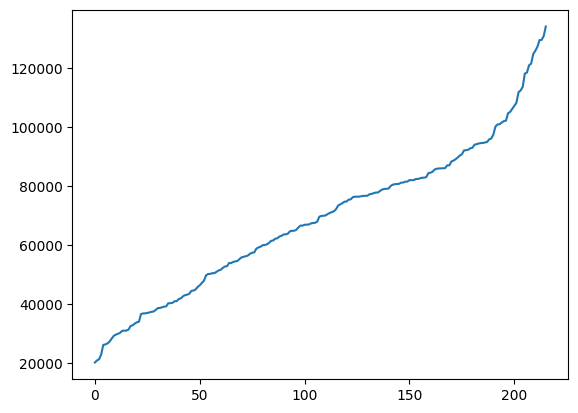

In [ ]:
import matplotlib.pyplot as plt

x_axis = [i for i in(range(len(dataset_3['btd'])))]

rain_count_value.sort()

# plt.plot(x_axis, rain_count_value)
plt.plot(x_axis, rain_count_value)
# plt.plot(x_axis, null_count_value)
# plt.title('title name')
# plt.xlabel('x_axis name')
# plt.ylabel('y_axis name')
plt.show()

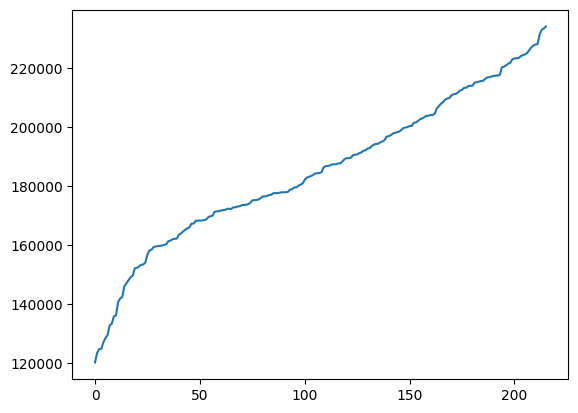

In [ ]:
import matplotlib.pyplot as plt

x_axis = [i for i in(range(len(dataset_3['btd'])))]

no_rain_count_value.sort()

# plt.plot(x_axis, rain_count_value)
plt.plot(x_axis, no_rain_count_value)
# plt.plot(x_axis, null_count_value)
# plt.title('title name')
# plt.xlabel('x_axis name')
# plt.ylabel('y_axis name')
plt.show()

In [ ]:
tmp =[value for value in no_rain_count_value if value > int(512*512-7774)*0.75]
len(tmp)

90

In [ ]:
len(tmp)/len(no_rain_count_value)

0.4166666666666667

In [ ]:
rain_count_value[0]

20168

In [ ]:
rain_count_value[-1]

134227

In [ ]:
tmp = np.array(rain_count_value)
np.mean(tmp)

68897.89814814815

In [ ]:
np.std(tmp)

25654.132577148706

In [ ]:
valid_rain_count_value = []
valid_no_rain_count_value = []
valid_null_count_value = []
for radar_img in valid_dataset_3["raw_radar"]:
  valid_rain_count_value.append(np.count_nonzero(radar_img > 0))
  valid_no_rain_count_value.append(np.count_nonzero(radar_img == 0))
  valid_null_count_value.append(np.count_nonzero(radar_img < 0))

In [ ]:
light_rain_count_value = []
for radar_img in dataset_3["raw_radar"]:
  light_rain_count_value.append(np.count_nonzero(radar_img > 0.5)) 

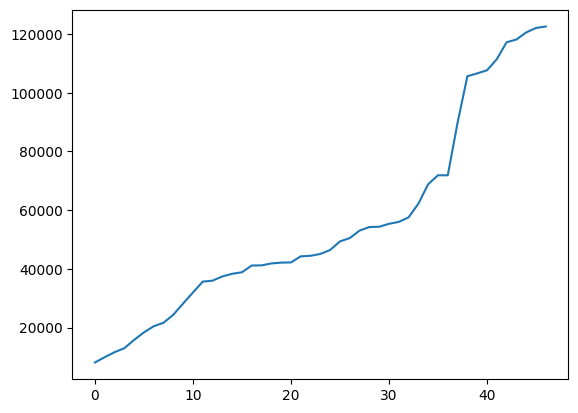

In [ ]:
import matplotlib.pyplot as plt

x_axis = [i for i in(range(len(valid_dataset_3['btd'])))]

valid_rain_count_value.sort()
# plt.plot(x_axis, valid_rain_count_value)
plt.plot(x_axis, valid_rain_count_value)
# plt.plot(x_axis, valid_null_count_value)
# plt.title('title name')
# plt.xlabel('x_axis name')
# plt.ylabel('y_axis name')
plt.show()

In [ ]:
valid_rain_count_value[-1]

122579

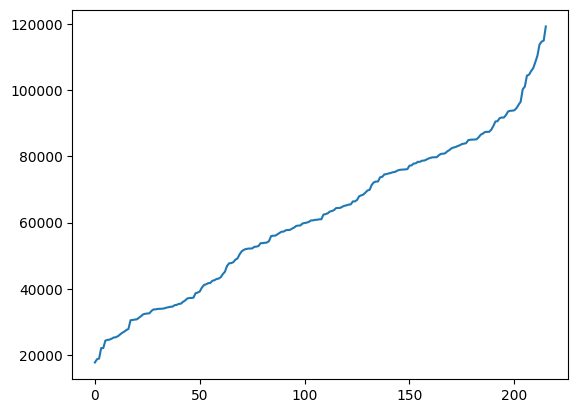

In [ ]:
import matplotlib.pyplot as plt

x_axis = [i for i in(range(len(dataset_3['btd'])))]

light_rain_count_value.sort()
# plt.plot(x_axis, valid_rain_count_value)
plt.plot(x_axis, light_rain_count_value)
# plt.plot(x_axis, valid_null_count_value)
# plt.title('title name')
# plt.xlabel('x_axis name')
# plt.ylabel('y_axis name')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x_axis = [i for i in(range(len(valid_dataset_3['btd'])))]

valid_rain_count_value.sort()
# plt.plot(x_axis, valid_rain_count_value)
plt.plot(x_axis, valid_rain_count_value)
# plt.plot(x_axis, valid_null_count_value)
# plt.title('title name')
# plt.xlabel('x_axis name')
# plt.ylabel('y_axis name')
plt.show()

In [ ]:
valid_rain_count_value[0]

8087

In [ ]:
tmp = np.array(valid_rain_count_value)
np.mean(tmp)

55415.1914893617

In [ ]:
np.std(tmp)

33461.60316302743

In [ ]:
tmp =[value for value in valid_no_rain_count_value if value > int(512*512-7774)*0.75]
len(tmp)

34

In [ ]:
len(tmp)/len(valid_no_rain_count_value)

0.723404255319149

In [ ]:
tmp =[value for value in valid_no_rain_count_value if value > int(512*512-7774)*0.75]
len(tmp)

In [ ]:
len(tmp)/len(valid_no_rain_count_value)

In [ ]:
null_set = set()
for null in null_count_value:
  null_set.add(null)
null_set

{7774}

In [ ]:
null_set = set()
for null in valid_null_count_value:
  null_set.add(null)
null_set

{7774}

In [ ]:
rain_frequency_rain_map = np.zeros((512, 512))
for radar_img in dataset_3['raw_radar']:
  tmp_1 = np.where(radar_img < 0, -1, 0)
  tmp_2 = np.where(radar_img <=0, 0, 1)
  rain_frequency_rain_map += tmp_1
  rain_frequency_rain_map += tmp_2

In [ ]:
rain_frequency_rain_map

array([[  15.,   17.,   17., ...,    1.,    1.,    1.],
       [  18.,   19.,   18., ...,    1.,    1.,    0.],
       [  18.,   20.,   18., ...,    0.,    0.,    0.],
       ...,
       [-216., -216., -216., ...,  148.,  149.,  150.],
       [-216., -216., -216., ...,  146.,  149.,  149.],
       [-216., -216., -216., ...,  143.,  146.,  147.]])

In [ ]:
rain_frequency_rain_map[rain_frequency_rain_map < 0] = -20

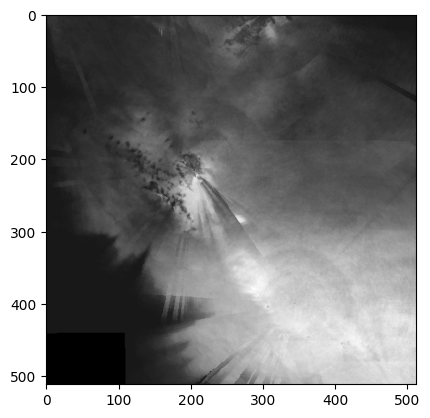

In [ ]:
plt.imshow(rain_frequency_rain_map, cmap='gray')

In [ ]:
len(valid_dataset_3['raw_radar'])

47

In [ ]:
valid_rain_frequency_rain_map = np.zeros((512, 512))
for radar_img in valid_dataset_3['raw_radar']:
  tmp_1 = np.where(radar_img < 0, -1, 0)
  tmp_2 = np.where(radar_img <=0, 0, 1)
  valid_rain_frequency_rain_map += tmp_1
  valid_rain_frequency_rain_map += tmp_2

In [ ]:
valid_rain_frequency_rain_map

array([[  8.,  11.,  11., ...,   0.,   0.,   0.],
       [  9.,  11.,  11., ...,   0.,   0.,   0.],
       [  9.,  13.,  13., ...,   0.,   0.,   0.],
       ...,
       [-47., -47., -47., ...,  26.,  28.,  28.],
       [-47., -47., -47., ...,  30.,  31.,  29.],
       [-47., -47., -47., ...,  29.,  27.,  28.]])

In [ ]:
valid_rain_frequency_rain_map[rain_frequency_rain_map < 0] = -4.5

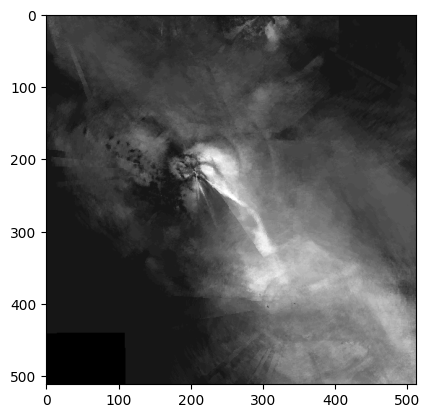

In [ ]:
plt.imshow(valid_rain_frequency_rain_map, cmap='gray')

In [ ]:
rain_average_rain_map = np.zeros((512, 512))
for radar_img in dataset_3['raw_radar']:
  radar_img[radar_img < 0]  = -1,
  rain_average_rain_map += radar_img
rain_average_rain_map = rain_average_rain_map/len(dataset_3['raw_radar'])

In [ ]:
rain_average_rain_map

array([[ 9.54629627e-02,  9.61574071e-02,  1.06666665e-01, ...,
         2.54629635e-03,  3.00925915e-03,  3.00925915e-03],
       [ 1.12037037e-01,  1.41157406e-01,  1.34907406e-01, ...,
         2.54629635e-03,  3.00925915e-03,  0.00000000e+00],
       [ 1.38055555e-01,  1.57870369e-01,  1.52361110e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         4.89157405e+00,  5.42583332e+00,  5.44055554e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         5.04277776e+00,  5.29263887e+00,  5.63009257e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         5.13472220e+00,  5.06481480e+00,  5.37796294e+00]])

In [ ]:
rain_average_rain_map.nonzero_count(rain_average_rain_map > 0 && r )

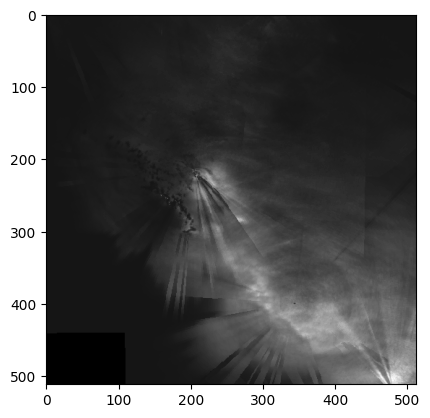

In [ ]:
plt.imshow(rain_average_rain_map, cmap='gray')

In [ ]:
valid_rain_average_rain_map = np.zeros((512, 512))
for radar_img in valid_dataset_3['raw_radar']:
  radar_img[radar_img < 0]  = -1,
  valid_rain_average_rain_map += radar_img
valid_rain_average_rain_map = valid_rain_average_rain_map/len(valid_dataset_3['raw_radar'])

In [ ]:
(valid_rain_average_rain_map)

array([[ 0.13234042,  0.18553191,  0.19085106, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16638298,  0.18170212,  0.17425531, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18638297,  0.19340425,  0.19340425, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.        , -1.        , -1.        , ...,  3.27851063,
         3.63723404,  3.47361701],
       [-1.        , -1.        , -1.        , ...,  3.29127658,
         3.18255318,  3.10510638],
       [-1.        , -1.        , -1.        , ...,  3.04574467,
         3.21489361,  3.47829786]])

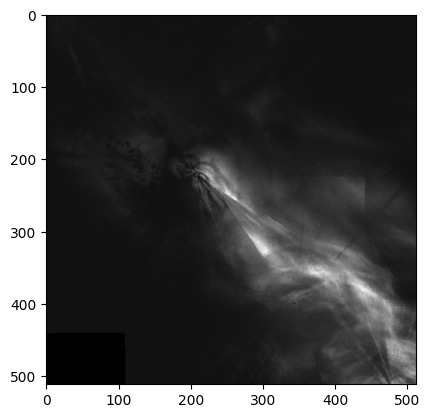

In [ ]:
plt.imshow(valid_rain_average_rain_map, cmap='gray')

# Pytorch data loading

In [ ]:
import torch

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data):
      self.data = data
      self.keys = data.keys()
    def __len__(self):
      return len(self.data['btd'])

    def __getitem__(self, idx):
      encoding = {}
      for k in self.keys:
        encoding[k] = self.data[k][idx]
      return encoding

In [ ]:
train_dataset = Dataset(dataset_3)
valid_dataset = Dataset(valid_dataset_3)

In [ ]:
train_dataset.__len__()

216

# PERSIANN model

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class ResBlock (nn.Module):
  def __init__(self, channels=32, kernel_size=(3,3), padding_size=1, stride=1):
    super(ResBlock, self).__init__()
    self.kernel_size = kernel_size
    self.padding_size = padding_size
    self.stride = stride
    self.conv_1 = nn.Conv2d(channels, channels, kernel_size=kernel_size, stride=stride, padding=padding_size)
    self.norm_1 = nn.BatchNorm2d(channels)
    self.activation_1 = nn.ReLU()
    self.conv_2 = nn.Conv2d(channels, channels, kernel_size=kernel_size, stride=stride, padding=padding_size)
    self.norm_2 = nn.BatchNorm2d(channels)
    self.activation = nn.ReLU()
  
  def forward(self, x):
    input = x
    x = self.conv_1(x)
    x = self.norm_1(x)
    x = self.activation_1(x)
    x = self.conv_2(x)
    x = self.norm_2(x)
    x = input + x
    x = self.activation(x)
    return x

In [ ]:
class PERSIANN (nn.Module):
  def __init__ (self, era_channels, visible_channels, ni_channels, wv_channels, ir_channels, btd_channels):
    super(PERSIANN, self).__init__()

    self.era_gate = nn.Sequential(
        nn.Conv2d(in_channels=era_channels, out_channels=32, kernel_size=(5, 5), stride=(2, 2), padding=2),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), stride=(2, 2), padding=1),
        ResBlock(channels=32, kernel_size=(3, 3), padding_size=1, stride=1))
    
    self.visible_gate = nn.Sequential(
        nn.Conv2d(in_channels=visible_channels, out_channels=32, kernel_size=(5, 5), stride=(2, 2), padding=2),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), stride=(2, 2), padding=1),
        ResBlock(channels=32, kernel_size=(3, 3), padding_size=1, stride=1))
    # 512 x 512 => 256 x 256
    self.ni_gate = nn.Sequential(
        nn.Conv2d(in_channels=ni_channels, out_channels=32, kernel_size=(5, 5), stride=(2, 2), padding=2),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), stride=(2, 2), padding=1),
        ResBlock(channels=32, kernel_size=(3, 3), padding_size=1, stride=1))
    
    self.wv_gate = nn.Sequential(
        nn.Conv2d(in_channels=wv_channels, out_channels=32, kernel_size=(5, 5), stride=(2, 2), padding=2),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), stride=(2, 2), padding=1),
        ResBlock(channels=32, kernel_size=(3, 3), padding_size=1, stride=1))
    
    self.ir_gate = nn.Sequential(
        nn.Conv2d(in_channels=ir_channels, out_channels=32, kernel_size=(5, 5), stride=(2, 2), padding=2),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), stride=(2, 2), padding=1),
        ResBlock(channels=32, kernel_size=(3, 3), padding_size=1, stride=1))
    
    self.btd_gate = nn.Sequential(
        nn.Conv2d(in_channels=btd_channels, out_channels=32, kernel_size=(5, 5), stride=(2, 2), padding=2),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), stride=(2, 2), padding=1),
        ResBlock(channels=32, kernel_size=(3, 3), padding_size=1, stride=1))
    
    self.fushion = nn.Sequential(
        nn.Conv2d(in_channels=192, out_channels= 64, kernel_size=(3,3), stride=(1,1), padding=1),
        ResBlock(channels=64, kernel_size=(3,3), padding_size=1, stride=1),
        nn.UpsamplingBilinear2d(scale_factor=2),

        nn.Conv2d(in_channels=64, out_channels= 32, kernel_size=(3,3), stride=(1,1), padding=1),
        ResBlock(channels=32, kernel_size=(3,3), padding_size=1, stride=1),
        nn.UpsamplingBilinear2d(scale_factor=2),

        nn.Conv2d(in_channels=32, out_channels= 32, kernel_size=(3,3), stride=(1,1), padding=1),
        ResBlock(channels=32, kernel_size=(3,3), padding_size=1, stride=1),
        nn.Conv2d(in_channels=32, out_channels=1, kernel_size=(1,1))
    )

  def forward(self, era_input, visible_input, ni_input, wv_input, ir_input, btd_input):
    era_output = self.era_gate(era_input)
    visible_output = self.visible_gate(visible_input)
    # print(era_output.shape)
    ni_output = self.ni_gate(ni_input)
    wv_output = self.wv_gate(wv_input)
    ir_output = self.ir_gate(ir_input)
    btd_output = self.btd_gate(btd_input)

    fushion_input = torch.cat((era_output, visible_output, ni_output, wv_output, ir_output, btd_output), 1)
    # print(fushion_input.shape)

    out = self.fushion(fushion_input)
    # print(out.shape)
    return torch.squeeze(out, 1)

In [ ]:
from torch.utils.data import DataLoader

def collate_fn(batch):
  era = [torch.from_numpy(item['era']) for item in batch]
  visible = [torch.from_numpy(item['visible']) for item in batch]
  ni = [torch.from_numpy(item['ni']) for item in batch]
  wv = [torch.from_numpy(item['wv']) for item in batch]
  ir = [torch.from_numpy(item['ir']) for item in batch]
  btd = [torch.from_numpy(item['btd']) for item in batch]
  radar = [torch.from_numpy(item['radar']) for item in batch]
  # create new batch
  answer_batch = {}
  answer_batch['era'] = torch.stack(era)
  answer_batch['visible'] = torch.stack(visible)
  answer_batch['ni'] = torch.stack(ni)
  answer_batch['wv'] = torch.stack(wv)
  answer_batch['ir'] = torch.stack(ir)
  answer_batch['btd'] = torch.stack(btd)
  answer_batch['radar'] = torch.stack(radar)
  return answer_batch


In [ ]:
train_dataloader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=16, shuffle=True)

In [ ]:
valid_dataloader = DataLoader(valid_dataset, collate_fn=collate_fn, batch_size=16, shuffle=False)

In [ ]:
tmp_train_batch = next(iter(train_dataloader))
tmp_valid_batch = next(iter(valid_dataloader))

In [ ]:
for k, v in tmp_train_batch.items():
  print(k, v.shape)

era torch.Size([16, 5, 512, 512])
visible torch.Size([16, 5, 512, 512])
ni torch.Size([16, 2, 512, 512])
wv torch.Size([16, 1, 512, 512])
ir torch.Size([16, 1, 512, 512])
btd torch.Size([16, 2, 512, 512])
radar torch.Size([16, 512, 512])


In [ ]:
model = PERSIANN(5, 5, 2, 1, 1, 2)
# tmp = model(tmp_train_batch['era'],
#             tmp_train_batch['visible'],
#             tmp_train_batch['ni'],
#             tmp_train_batch['wv'],
#             tmp_train_batch['ir'],
#             tmp_train_batch['btd'],)

In [ ]:
class RMSELoss(nn.Module):
    def __init__(self, eps=1e-6):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        
    def forward(self,yhat,y):
        loss = torch.sqrt(self.mse(yhat,y) + self.eps)
        return loss

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

In [ ]:
model = model.to(device)

In [ ]:
total_params = sum([p.numel() for p in model.parameters()])
total_params

429985

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as scheduler
max_epochs = 40
learning_rate = 4e-4

weight_decay = 0.01
optimizing_parameters = filter(lambda p: p.requires_grad, model.parameters())
criterion = RMSELoss()

optimizer = optim.SGD(
    optimizing_parameters,
    lr=learning_rate,
    weight_decay=weight_decay
)

scheduler = scheduler.PolynomialLR(optimizer,
                                   total_iters = max_epochs,
                                   power = 2)

In [ ]:
from tqdm import tqdm

In [ ]:
# train with GPU
train_losses = []
valid_losses = []
for epoch in range(max_epochs):

  # training phase
  model.train()
  print(f"epoch {epoch} started")
  total_loss = 0
  total = len(train_dataloader)
  for batch in tqdm(train_dataloader):

    # compute output of the model on the mini-batch
    era = batch['era'].to(device)
    visible = batch['visible'].to(device)
    ni = batch['ni'].to(device)
    wv = batch['wv'].to(device)
    ir = batch['ir'].to(device)
    btd = batch['btd'].to(device)
    radar = batch['radar'].to(device)
    out = model(era, visible, ni, wv, ir, btd)

    # compute loss function
    loss = criterion(out, radar)
    total_loss += loss 
    # calculate derivative and do a gradient descent step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  avg_loss = total_loss / total
  train_losses.append(avg_loss)
  print(f"epoch {epoch} train_avg_loss {avg_loss}")


  # testing phase
  model.eval()
  total = len(valid_dataloader)
  total_loss = 0 # count number of correct predictions on test set

  for batch in tqdm(valid_dataloader):
    with torch.no_grad(): # prevent gradient computation
      era = batch['era'].to(device)
      visible = batch['visible'].to(device)
      ni = batch['ni'].to(device)
      wv = batch['wv'].to(device)
      ir = batch['ir'].to(device)
      btd = batch['btd'].to(device)
      radar = batch['radar'].to(device)
      out = model(era, visible, ni, wv, ir, btd)
      loss = criterion(out, radar)
      total_loss += loss

  # compute test accuracy for this epoch
  avg_loss = total_loss / total
  valid_losses.append(avg_loss)
  print(f"epoch {epoch} valid_avg_loss {avg_loss}")

epoch 0 started


100%|██████████| 54/54 [00:18<00:00,  2.87it/s]


epoch 0 train_avg_loss 3.787041187286377
epoch 0 valid_avg_loss 3.2148051261901855
epoch 1 started


100%|██████████| 54/54 [00:09<00:00,  5.56it/s]


epoch 1 train_avg_loss 3.630340576171875
epoch 1 valid_avg_loss 3.0639472007751465
epoch 2 started


100%|██████████| 54/54 [00:09<00:00,  5.54it/s]


epoch 2 train_avg_loss 3.605320692062378
epoch 2 valid_avg_loss 3.062432289123535
epoch 3 started


100%|██████████| 54/54 [00:09<00:00,  5.51it/s]


epoch 3 train_avg_loss 3.5767271518707275
epoch 3 valid_avg_loss 3.034783363342285
epoch 4 started


100%|██████████| 54/54 [00:09<00:00,  5.49it/s]


epoch 4 train_avg_loss 3.525118350982666
epoch 4 valid_avg_loss 3.2314186096191406
epoch 5 started


100%|██████████| 54/54 [00:09<00:00,  5.47it/s]


epoch 5 train_avg_loss 3.539390802383423
epoch 5 valid_avg_loss 3.022974729537964
epoch 6 started


100%|██████████| 54/54 [00:09<00:00,  5.45it/s]


epoch 6 train_avg_loss 3.499241352081299
epoch 6 valid_avg_loss 3.0073795318603516
epoch 7 started


100%|██████████| 54/54 [00:10<00:00,  4.95it/s]


epoch 7 train_avg_loss 3.475088119506836
epoch 7 valid_avg_loss 3.055255889892578
epoch 8 started


100%|██████████| 54/54 [00:09<00:00,  5.41it/s]


epoch 8 train_avg_loss 3.455528736114502
epoch 8 valid_avg_loss 2.9768056869506836
epoch 9 started


100%|██████████| 54/54 [00:10<00:00,  5.39it/s]


epoch 9 train_avg_loss 3.4495389461517334
epoch 9 valid_avg_loss 2.939511775970459
epoch 10 started


100%|██████████| 54/54 [00:10<00:00,  5.30it/s]


epoch 10 train_avg_loss 3.4512341022491455
epoch 10 valid_avg_loss 2.9028782844543457
epoch 11 started


100%|██████████| 54/54 [00:10<00:00,  5.36it/s]


epoch 11 train_avg_loss 3.40330171585083
epoch 11 valid_avg_loss 3.0103979110717773
epoch 12 started


100%|██████████| 54/54 [00:10<00:00,  5.35it/s]


epoch 12 train_avg_loss 3.4090898036956787
epoch 12 valid_avg_loss 3.34289813041687
epoch 13 started


100%|██████████| 54/54 [00:10<00:00,  5.33it/s]


epoch 13 train_avg_loss 3.4008867740631104
epoch 13 valid_avg_loss 2.9467341899871826
epoch 14 started


100%|██████████| 54/54 [00:10<00:00,  5.32it/s]


epoch 14 train_avg_loss 3.3925235271453857
epoch 14 valid_avg_loss 3.0610427856445312
epoch 15 started


100%|██████████| 54/54 [00:10<00:00,  5.31it/s]


epoch 15 train_avg_loss 3.3883187770843506
epoch 15 valid_avg_loss 3.173828601837158
epoch 16 started


100%|██████████| 54/54 [00:10<00:00,  5.29it/s]


epoch 16 train_avg_loss 3.3775620460510254
epoch 16 valid_avg_loss 3.080134868621826
epoch 17 started


100%|██████████| 54/54 [00:10<00:00,  5.26it/s]


epoch 17 train_avg_loss 3.372938871383667
epoch 17 valid_avg_loss 2.9525318145751953
epoch 18 started


100%|██████████| 54/54 [00:10<00:00,  5.26it/s]


epoch 18 train_avg_loss 3.361096143722534
epoch 18 valid_avg_loss 4.8201518058776855
epoch 19 started


100%|██████████| 54/54 [00:10<00:00,  5.25it/s]


epoch 19 train_avg_loss 3.3593177795410156
epoch 19 valid_avg_loss 3.2953097820281982


In [ ]:
# train with GPU
train_losses = []
valid_losses = []
for epoch in range(max_epochs):

  # training phase
  model.train()
  print(f"epoch {epoch} started")
  total_loss = 0
  total = len(train_dataloader)
  for batch in tqdm(train_dataloader):

    # compute output of the model on the mini-batch
    era = batch['era'].to(device)
    visible = batch['visible'].to(device)
    ni = batch['ni'].to(device)
    wv = batch['wv'].to(device)
    ir = batch['ir'].to(device)
    btd = batch['btd'].to(device)
    radar = batch['radar'].to(device)
    out = model(era, visible, ni, wv, ir, btd)

    # compute loss function
    loss = criterion(out, radar)
    total_loss += loss 
    # calculate derivative and do a gradient descent step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  avg_loss = total_loss / total
  train_losses.append(avg_loss)
  print(f"epoch {epoch} train_avg_loss {avg_loss}")


  # testing phase
  model.eval()
  total = len(valid_dataloader)
  total_loss = 0 # count number of correct predictions on test set

  for batch in valid_dataloader:
    with torch.no_grad(): # prevent gradient computation
      era = batch['era'].to(device)
      visible = batch['visible'].to(device)
      ni = batch['ni'].to(device)
      wv = batch['wv'].to(device)
      ir = batch['ir'].to(device)
      btd = batch['btd'].to(device)
      radar = batch['radar'].to(device)
      out = model(era, visible, ni, wv, ir, btd)
      loss = criterion(out, radar)
      total_loss += loss

  # compute test accuracy for this epoch
  avg_loss = total_loss / total
  valid_losses.append(avg_loss)
  print(f"epoch {epoch} valid_avg_loss {avg_loss}")

epoch 0 started


100%|██████████| 54/54 [00:09<00:00,  5.41it/s]


epoch 0 train_avg_loss 3.458439588546753
epoch 0 valid_avg_loss 3.0611748695373535
epoch 1 started


100%|██████████| 54/54 [00:09<00:00,  5.41it/s]


epoch 1 train_avg_loss 3.4358513355255127
epoch 1 valid_avg_loss 3.2814767360687256
epoch 2 started


100%|██████████| 54/54 [00:10<00:00,  5.40it/s]


epoch 2 train_avg_loss 3.4006924629211426
epoch 2 valid_avg_loss 2.907156467437744
epoch 3 started


100%|██████████| 54/54 [00:10<00:00,  5.38it/s]


epoch 3 train_avg_loss 3.4045467376708984
epoch 3 valid_avg_loss 3.130733013153076
epoch 4 started


100%|██████████| 54/54 [00:10<00:00,  5.35it/s]


epoch 4 train_avg_loss 3.410991907119751
epoch 4 valid_avg_loss 3.264345169067383
epoch 5 started


100%|██████████| 54/54 [00:10<00:00,  5.33it/s]


epoch 5 train_avg_loss 3.3709895610809326
epoch 5 valid_avg_loss 3.3657588958740234
epoch 6 started


100%|██████████| 54/54 [00:10<00:00,  5.32it/s]


epoch 6 train_avg_loss 3.3472142219543457
epoch 6 valid_avg_loss 3.1086347103118896
epoch 7 started


100%|██████████| 54/54 [00:10<00:00,  5.31it/s]


epoch 7 train_avg_loss 3.35870099067688
epoch 7 valid_avg_loss 7.97353458404541
epoch 8 started


100%|██████████| 54/54 [00:10<00:00,  5.22it/s]


epoch 8 train_avg_loss 3.343524932861328
epoch 8 valid_avg_loss 3.3255391120910645
epoch 9 started


100%|██████████| 54/54 [00:10<00:00,  5.15it/s]


epoch 9 train_avg_loss 3.3429958820343018
epoch 9 valid_avg_loss 3.1807589530944824
epoch 10 started


100%|██████████| 54/54 [00:10<00:00,  5.19it/s]


epoch 10 train_avg_loss 3.3541011810302734
epoch 10 valid_avg_loss 13.918813705444336
epoch 11 started


100%|██████████| 54/54 [00:11<00:00,  4.85it/s]


epoch 11 train_avg_loss 3.3600926399230957
epoch 11 valid_avg_loss 3.435729503631592
epoch 12 started


100%|██████████| 54/54 [00:10<00:00,  5.26it/s]


epoch 12 train_avg_loss 3.330716848373413
epoch 12 valid_avg_loss 3.5757415294647217
epoch 13 started


100%|██████████| 54/54 [00:10<00:00,  5.16it/s]


epoch 13 train_avg_loss 3.355800151824951
epoch 13 valid_avg_loss 3.15208101272583
epoch 14 started


100%|██████████| 54/54 [00:10<00:00,  5.03it/s]


epoch 14 train_avg_loss 3.332756280899048
epoch 14 valid_avg_loss 4.671011924743652
epoch 15 started


100%|██████████| 54/54 [00:10<00:00,  5.24it/s]


epoch 15 train_avg_loss 3.315668821334839
epoch 15 valid_avg_loss 3.1586709022521973
epoch 16 started


100%|██████████| 54/54 [00:10<00:00,  5.24it/s]


epoch 16 train_avg_loss 3.3237671852111816
epoch 16 valid_avg_loss 2.960876941680908
epoch 17 started


100%|██████████| 54/54 [00:10<00:00,  5.10it/s]


epoch 17 train_avg_loss 3.3234989643096924
epoch 17 valid_avg_loss 5.877053260803223
epoch 18 started


100%|██████████| 54/54 [00:10<00:00,  5.20it/s]


epoch 18 train_avg_loss 3.3045198917388916
epoch 18 valid_avg_loss 3.0331828594207764
epoch 19 started


100%|██████████| 54/54 [00:10<00:00,  5.18it/s]


epoch 19 train_avg_loss 3.3004837036132812
epoch 19 valid_avg_loss 5.714574337005615


In [ ]:
# train with GPU
train_losses = []
valid_losses = []
for epoch in range(max_epochs):

  # training phase
  model.train()
  print(f"epoch {epoch} started")
  total_loss = 0
  total = len(train_dataloader)
  for batch in tqdm(train_dataloader):

    # compute output of the model on the mini-batch
    era = batch['era'].to(device)
    visible = batch['visible'].to(device)
    ni = batch['ni'].to(device)
    wv = batch['wv'].to(device)
    ir = batch['ir'].to(device)
    btd = batch['btd'].to(device)
    radar = batch['radar'].to(device)
    out = model(era, visible, ni, wv, ir, btd)

    # compute loss function
    loss = criterion(out, radar)
    total_loss += loss 
    # calculate derivative and do a gradient descent step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  avg_loss = total_loss / total
  train_losses.append(avg_loss)
  print(f"epoch {epoch} train_avg_loss {avg_loss}")


  # testing phase
  model.eval()
  total = len(valid_dataloader)
  total_loss = 0 # count number of correct predictions on test set

  for batch in tqdm(valid_dataloader):
    with torch.no_grad(): # prevent gradient computation
      era = batch['era'].to(device)
      visible = batch['visible'].to(device)
      ni = batch['ni'].to(device)
      wv = batch['wv'].to(device)
      ir = batch['ir'].to(device)
      btd = batch['btd'].to(device)
      radar = batch['radar'].to(device)
      out = model(era, visible, ni, wv, ir, btd)
      loss = criterion(out, radar)
      total_loss += loss

  # compute test accuracy for this epoch
  avg_loss = total_loss / total
  valid_losses.append(avg_loss)
  print(f"epoch {epoch} valid_avg_loss {avg_loss}")

# U-net model

In [ ]:
import torch
import torch.nn as nn

def double_convolution(in_channels, out_channels):
    """
    In the original paper implementation, the convolution operations were
    not padded but we are padding them here. This is because, we need the 
    output result size to be same as input size.
    """
    conv_op = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
        nn.ReLU(inplace=True)
    )
    return conv_op

In [ ]:
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        # Contracting path.
        # Each convolution is applied twice.
        self.down_convolution_1 = double_convolution(in_channels, 64)
        self.down_convolution_2 = double_convolution(64, 128)
        self.down_convolution_3 = double_convolution(128, 256)
        self.down_convolution_4 = double_convolution(256, 512)
        self.down_convolution_5 = double_convolution(512, 1024)
        # Expanding path.
        self.up_transpose_1 = nn.ConvTranspose2d(
            in_channels=1024, out_channels=512,
            kernel_size=2, 
            stride=2)
        # Below, `in_channels` again becomes 1024 as we are concatinating.
        self.up_convolution_1 = double_convolution(1024, 512)
        self.up_transpose_2 = nn.ConvTranspose2d(
            in_channels=512, out_channels=256,
            kernel_size=2, 
            stride=2)
        self.up_convolution_2 = double_convolution(512, 256)
        self.up_transpose_3 = nn.ConvTranspose2d(
            in_channels=256, out_channels=128,
            kernel_size=2, 
            stride=2)
        self.up_convolution_3 = double_convolution(256, 128)
        self.up_transpose_4 = nn.ConvTranspose2d(
            in_channels=128, out_channels=64,
            kernel_size=2, 
            stride=2)
        self.up_convolution_4 = double_convolution(128, 64)
        # output => `out_channels` as per the number of classes.
        self.out = nn.Conv2d(
            in_channels=64, out_channels=out_channels, 
            kernel_size=1
        ) 
    def forward(self, x):
        down_1 = self.down_convolution_1(x)
        down_2 = self.max_pool2d(down_1)
        down_3 = self.down_convolution_2(down_2)
        down_4 = self.max_pool2d(down_3)
        down_5 = self.down_convolution_3(down_4)
        down_6 = self.max_pool2d(down_5)
        down_7 = self.down_convolution_4(down_6)
        down_8 = self.max_pool2d(down_7)
        down_9 = self.down_convolution_5(down_8)        
        # *** DO NOT APPLY MAX POOL TO down_9 ***
        
        up_1 = self.up_transpose_1(down_9)
        x = self.up_convolution_1(torch.cat([down_7, up_1], 1))
        up_2 = self.up_transpose_2(x)
        x = self.up_convolution_2(torch.cat([down_5, up_2], 1))
        up_3 = self.up_transpose_3(x)
        x = self.up_convolution_3(torch.cat([down_3, up_3], 1))
        up_4 = self.up_transpose_4(x)
        x = self.up_convolution_4(torch.cat([down_1, up_4], 1))
        out = self.out(x)
        return torch.squeeze(out, 1)

In [ ]:
from torch.utils.data import DataLoader

def collate_fn_unet(batch):
  era = [torch.from_numpy(item['era']) for item in batch]
  visible = [torch.from_numpy(item['visible']) for item in batch]
  ni = [torch.from_numpy(item['ni']) for item in batch]
  wv = [torch.from_numpy(item['wv']) for item in batch]
  ir = [torch.from_numpy(item['ir']) for item in batch]
  btd = [torch.from_numpy(item['btd']) for item in batch]
  radar = [torch.from_numpy(item['radar']) for item in batch]
  # create new batch
  answer_batch = {}
  answer_batch['feature'] = torch.cat((torch.stack(era),
                                       torch.stack(visible),
                                       torch.stack(ni),
                                       torch.stack(wv),
                                       torch.stack(ir),
                                       torch.stack(btd)),
                                      1)
  answer_batch['radar'] = torch.stack(radar)
  return answer_batch

In [ ]:
train_dataloader = DataLoader(train_dataset, collate_fn=collate_fn_unet, batch_size=4, shuffle=True)

In [ ]:
valid_dataloader = DataLoader(valid_dataset, collate_fn=collate_fn_unet, batch_size=4, shuffle=False)

In [ ]:
tmp_train_batch = next(iter(train_dataloader))
tmp_valid_batch = next(iter(valid_dataloader))

In [ ]:
for k, v in tmp_train_batch.items():
  print(k, v.shape)

feature torch.Size([1, 16, 512, 512])
radar torch.Size([1, 512, 512])


In [ ]:
model = UNet(16, 1)
# tmp = model(tmp_train_batch['era'],
#             tmp_train_batch['visible'],
#             tmp_train_batch['ni'],
#             tmp_train_batch['wv'],
#             tmp_train_batch['ir'],
#             tmp_train_batch['btd'],)

In [ ]:
class RMSELoss(nn.Module):
    def __init__(self, eps=1e-6):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        
    def forward(self,yhat,y):
        loss = torch.sqrt(self.mse(yhat,y) + self.eps)
        return loss

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

In [ ]:
model = model.to(device)

In [ ]:
total_params = sum([p.numel() for p in model.parameters()])
total_params

31039233

In [ ]:
model(tmp_train_batch['feature'].to(device)).shape

NameError: ignored

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as scheduler
max_epochs = 20
learning_rate = 5e-4

weight_decay = 0.01
optimizing_parameters = filter(lambda p: p.requires_grad, model.parameters())
criterion = RMSELoss()

optimizer = optim.AdamW(
    optimizing_parameters,
    lr=learning_rate,
    weight_decay=weight_decay
)
scheduler = scheduler.PolynomialLR(optimizer,
                                   total_iters = max_epochs,
                                   power = 2)

In [ ]:
from tqdm import tqdm

In [ ]:
# train with GPU
train_losses = []
valid_losses = []

for epoch in range(max_epochs):

  # training phase
  model.train()
  print(f"epoch {epoch} started")
  total_loss = 0
  total = len(train_dataloader)
  for batch in tqdm(train_dataloader):

    # compute output of the model on the mini-batch
    feature = batch['feature'].to(device)
    radar = batch['radar'].to(device)
    out = model(feature)

    # compute loss function
    loss = criterion(out, radar)
    total_loss += loss 
    # calculate derivative and do a gradient descent step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # scheduler.step()

  avg_loss = total_loss / total
  train_losses.append(avg_loss)
  print(f"epoch {epoch} train_avg_loss {avg_loss}")


  # testing phase
  model.eval()
  total = len(valid_dataloader)
  total_loss = 0 # count number of correct predictions on test set

  for batch in tqdm(valid_dataloader):
    with torch.no_grad(): # prevent gradient computation
      feature = batch['feature'].to(device)
      radar = batch['radar'].to(device)
      out = model(feature)

      loss = criterion(out, radar)
      total_loss += loss

  # compute test accuracy for this epoch
  avg_loss = total_loss / total
  valid_losses.append(avg_loss)
  print(f"epoch {epoch} valid_avg_loss {avg_loss}")

epoch 0 started


100%|██████████| 54/54 [00:42<00:00,  1.26it/s]


epoch 0 train_avg_loss 3.6583597660064697


100%|██████████| 12/12 [00:03<00:00,  3.49it/s]


epoch 0 valid_avg_loss 3.011885643005371
epoch 1 started


100%|██████████| 54/54 [00:43<00:00,  1.24it/s]


epoch 1 train_avg_loss 3.5528547763824463


100%|██████████| 12/12 [00:03<00:00,  3.47it/s]


epoch 1 valid_avg_loss 2.98215913772583
epoch 2 started


100%|██████████| 54/54 [00:44<00:00,  1.22it/s]


epoch 2 train_avg_loss 3.5284194946289062


100%|██████████| 12/12 [00:03<00:00,  3.44it/s]


epoch 2 valid_avg_loss 2.965360641479492
epoch 3 started


100%|██████████| 54/54 [00:43<00:00,  1.23it/s]


epoch 3 train_avg_loss 3.572239875793457


100%|██████████| 12/12 [00:03<00:00,  3.44it/s]


epoch 3 valid_avg_loss 3.005812168121338
epoch 4 started


100%|██████████| 54/54 [00:43<00:00,  1.23it/s]


epoch 4 train_avg_loss 3.5144035816192627


100%|██████████| 12/12 [00:03<00:00,  3.45it/s]


epoch 4 valid_avg_loss 3.0255236625671387
epoch 5 started


100%|██████████| 54/54 [00:43<00:00,  1.23it/s]


epoch 5 train_avg_loss 3.539065361022949


100%|██████████| 12/12 [00:03<00:00,  3.44it/s]


epoch 5 valid_avg_loss 2.9859960079193115
epoch 6 started


100%|██████████| 54/54 [00:43<00:00,  1.23it/s]


epoch 6 train_avg_loss 3.5272600650787354


100%|██████████| 12/12 [00:03<00:00,  3.44it/s]


epoch 6 valid_avg_loss 2.976560592651367
epoch 7 started


100%|██████████| 54/54 [00:43<00:00,  1.24it/s]


epoch 7 train_avg_loss 3.592921257019043


100%|██████████| 12/12 [00:03<00:00,  3.41it/s]


epoch 7 valid_avg_loss 3.1533095836639404
epoch 8 started


100%|██████████| 54/54 [00:43<00:00,  1.24it/s]


epoch 8 train_avg_loss 3.5178287029266357


100%|██████████| 12/12 [00:03<00:00,  3.45it/s]


epoch 8 valid_avg_loss 2.9691739082336426
epoch 9 started


100%|██████████| 54/54 [00:43<00:00,  1.24it/s]


epoch 9 train_avg_loss 3.4972431659698486


100%|██████████| 12/12 [00:03<00:00,  3.46it/s]


epoch 9 valid_avg_loss 2.938985586166382
epoch 10 started


100%|██████████| 54/54 [00:43<00:00,  1.25it/s]


epoch 10 train_avg_loss 3.507232189178467


100%|██████████| 12/12 [00:03<00:00,  3.42it/s]


epoch 10 valid_avg_loss 3.126786231994629
epoch 11 started


100%|██████████| 54/54 [00:43<00:00,  1.25it/s]


epoch 11 train_avg_loss 3.5122241973876953


100%|██████████| 12/12 [00:03<00:00,  3.46it/s]


epoch 11 valid_avg_loss 2.945380210876465
epoch 12 started


100%|██████████| 54/54 [00:43<00:00,  1.25it/s]


epoch 12 train_avg_loss 3.522568702697754


100%|██████████| 12/12 [00:03<00:00,  3.44it/s]


epoch 12 valid_avg_loss 2.961390495300293
epoch 13 started


100%|██████████| 54/54 [00:43<00:00,  1.23it/s]


epoch 13 train_avg_loss 3.5042388439178467


100%|██████████| 12/12 [00:03<00:00,  3.41it/s]


epoch 13 valid_avg_loss 2.9696052074432373
epoch 14 started


100%|██████████| 54/54 [00:43<00:00,  1.25it/s]


epoch 14 train_avg_loss 3.5095884799957275


100%|██████████| 12/12 [00:03<00:00,  3.41it/s]


epoch 14 valid_avg_loss 3.0410470962524414
epoch 15 started


100%|██████████| 54/54 [00:43<00:00,  1.24it/s]


epoch 15 train_avg_loss 3.52213716506958


100%|██████████| 12/12 [00:03<00:00,  3.45it/s]


epoch 15 valid_avg_loss 2.926558494567871
epoch 16 started


100%|██████████| 54/54 [00:43<00:00,  1.23it/s]


epoch 16 train_avg_loss 3.4942779541015625


100%|██████████| 12/12 [00:03<00:00,  3.43it/s]


epoch 16 valid_avg_loss 2.9340102672576904
epoch 17 started


100%|██████████| 54/54 [00:43<00:00,  1.24it/s]


epoch 17 train_avg_loss 3.527614116668701


100%|██████████| 12/12 [00:03<00:00,  3.24it/s]


epoch 17 valid_avg_loss 2.960386037826538
epoch 18 started


100%|██████████| 54/54 [00:43<00:00,  1.23it/s]


epoch 18 train_avg_loss 3.504505157470703


100%|██████████| 12/12 [00:03<00:00,  3.45it/s]


epoch 18 valid_avg_loss 2.9380195140838623
epoch 19 started


100%|██████████| 54/54 [00:43<00:00,  1.25it/s]


epoch 19 train_avg_loss 3.490635871887207


100%|██████████| 12/12 [00:03<00:00,  3.44it/s]


epoch 19 valid_avg_loss 2.915469169616699


In [ ]:
# train with GPU
train_losses = []
valid_losses = []
for epoch in range(max_epochs):

  # training phase
  model.train()
  print(f"epoch {epoch} started")
  total_loss = 0
  total = len(train_dataloader)
  for batch in tqdm(train_dataloader):

    # compute output of the model on the mini-batch
    feature = batch['feature'].to(device)
    radar = batch['radar'].to(device)
    out = model(feature)

    # compute loss function
    loss = criterion(out, radar)
    total_loss += loss 
    # calculate derivative and do a gradient descent step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

  avg_loss = total_loss / total
  train_losses.append(avg_loss)
  
  print(f"epoch {epoch} train_avg_loss {avg_loss}")


  # testing phase
  model.eval()
  total = len(valid_dataloader)
  total_loss = 0 # count number of correct predictions on test set

  for batch in tqdm(valid_dataloader):
    with torch.no_grad(): # prevent gradient computation
      feature = batch['feature'].to(device)
      radar = batch['radar'].to(device)
      out = model(feature)

      loss = criterion(out, radar)
      total_loss += loss

  # compute test accuracy for this epoch
  avg_loss = total_loss / total
  print(f"epoch {epoch} valid_avg_loss {avg_loss}")

epoch 0 started


100%|██████████| 54/54 [00:45<00:00,  1.18it/s]


epoch 0 train_avg_loss 3.9681832790374756


100%|██████████| 12/12 [00:03<00:00,  3.41it/s]


epoch 0 valid_avg_loss 3.259459972381592
epoch 1 started


100%|██████████| 54/54 [00:44<00:00,  1.22it/s]


epoch 1 train_avg_loss 3.7999141216278076


100%|██████████| 12/12 [00:03<00:00,  3.40it/s]


epoch 1 valid_avg_loss 3.259459972381592
epoch 2 started


100%|██████████| 54/54 [00:44<00:00,  1.20it/s]


epoch 2 train_avg_loss 3.793699264526367


100%|██████████| 12/12 [00:03<00:00,  3.38it/s]


epoch 2 valid_avg_loss 3.259459972381592
epoch 3 started


100%|██████████| 54/54 [00:44<00:00,  1.21it/s]


epoch 3 train_avg_loss 3.8033368587493896


100%|██████████| 12/12 [00:03<00:00,  3.41it/s]


epoch 3 valid_avg_loss 3.259459972381592
epoch 4 started


100%|██████████| 54/54 [00:44<00:00,  1.21it/s]


epoch 4 train_avg_loss 3.790327787399292


100%|██████████| 12/12 [00:03<00:00,  3.40it/s]


epoch 4 valid_avg_loss 3.259459972381592
epoch 5 started


100%|██████████| 54/54 [00:44<00:00,  1.20it/s]


epoch 5 train_avg_loss 3.788907289505005


100%|██████████| 12/12 [00:03<00:00,  3.36it/s]


epoch 5 valid_avg_loss 3.259459972381592
epoch 6 started


100%|██████████| 54/54 [00:44<00:00,  1.20it/s]


epoch 6 train_avg_loss 3.8117434978485107


100%|██████████| 12/12 [00:03<00:00,  3.40it/s]


epoch 6 valid_avg_loss 3.259459972381592
epoch 7 started


100%|██████████| 54/54 [00:44<00:00,  1.20it/s]


epoch 7 train_avg_loss 3.7785913944244385


100%|██████████| 12/12 [00:03<00:00,  3.39it/s]


epoch 7 valid_avg_loss 3.259459972381592
epoch 8 started


100%|██████████| 54/54 [00:44<00:00,  1.20it/s]


epoch 8 train_avg_loss 3.791487216949463


100%|██████████| 12/12 [00:03<00:00,  3.40it/s]


epoch 8 valid_avg_loss 3.259459972381592
epoch 9 started


100%|██████████| 54/54 [00:44<00:00,  1.21it/s]


epoch 9 train_avg_loss 3.811190605163574


100%|██████████| 12/12 [00:03<00:00,  3.40it/s]


epoch 9 valid_avg_loss 3.259459972381592
epoch 10 started


100%|██████████| 54/54 [00:44<00:00,  1.20it/s]


epoch 10 train_avg_loss 3.7945632934570312


100%|██████████| 12/12 [00:03<00:00,  3.40it/s]


epoch 10 valid_avg_loss 3.259459972381592
epoch 11 started


100%|██████████| 54/54 [00:44<00:00,  1.21it/s]


epoch 11 train_avg_loss 3.806506395339966


100%|██████████| 12/12 [00:03<00:00,  3.37it/s]


epoch 11 valid_avg_loss 3.259459972381592
epoch 12 started


100%|██████████| 54/54 [00:44<00:00,  1.21it/s]


epoch 12 train_avg_loss 3.780658721923828


100%|██████████| 12/12 [00:03<00:00,  3.39it/s]


epoch 12 valid_avg_loss 3.259459972381592
epoch 13 started


100%|██████████| 54/54 [00:44<00:00,  1.21it/s]


epoch 13 train_avg_loss 3.7908599376678467


100%|██████████| 12/12 [00:03<00:00,  3.41it/s]


epoch 13 valid_avg_loss 3.259459972381592
epoch 14 started


100%|██████████| 54/54 [00:44<00:00,  1.21it/s]


epoch 14 train_avg_loss 3.7951552867889404


100%|██████████| 12/12 [00:03<00:00,  3.36it/s]


epoch 14 valid_avg_loss 3.259459972381592
epoch 15 started


100%|██████████| 54/54 [00:44<00:00,  1.20it/s]


epoch 15 train_avg_loss 3.8093388080596924


100%|██████████| 12/12 [00:03<00:00,  3.38it/s]


epoch 15 valid_avg_loss 3.259459972381592
epoch 16 started


100%|██████████| 54/54 [00:44<00:00,  1.20it/s]


epoch 16 train_avg_loss 3.7909939289093018


100%|██████████| 12/12 [00:03<00:00,  3.39it/s]


epoch 16 valid_avg_loss 3.259459972381592
epoch 17 started


100%|██████████| 54/54 [00:44<00:00,  1.21it/s]


epoch 17 train_avg_loss 3.774015426635742


100%|██████████| 12/12 [00:03<00:00,  3.38it/s]


epoch 17 valid_avg_loss 3.259459972381592
epoch 18 started


100%|██████████| 54/54 [00:44<00:00,  1.21it/s]


epoch 18 train_avg_loss 3.7832679748535156


100%|██████████| 12/12 [00:03<00:00,  3.39it/s]


epoch 18 valid_avg_loss 3.259459972381592
epoch 19 started


100%|██████████| 54/54 [00:44<00:00,  1.21it/s]


epoch 19 train_avg_loss 3.7959961891174316


100%|██████████| 12/12 [00:03<00:00,  3.37it/s]

epoch 19 valid_avg_loss 3.259459972381592
